<a href="https://colab.research.google.com/github/Juliana-CP/Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [6]:
faturamento = {
    "Loja 1": loja1["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum()
}


In [60]:
for loja, valor in faturamento.items():
    print(f"{loja}: R$ {valor:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [7]:
def contar_por_categoria(df, nome_loja):
    contagem = df["Categoria do Produto"].value_counts()
    print(f"\n📦 Categorias mais vendidas - {nome_loja}")
    print(contagem)
    return contagem

In [8]:
contar_por_categoria(loja1, "Loja 1")
contar_por_categoria(loja2, "Loja 2")
contar_por_categoria(loja3, "Loja 3")
contar_por_categoria(loja4, "Loja 4")





📦 Categorias mais vendidas - Loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

📦 Categorias mais vendidas - Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

📦 Categorias mais vendidas - Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

📦 Categorias mais vendidas - Loja 4
Categoria do Pr

,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


# 3. Média de Avaliação das Lojas

In [9]:
def media_avaliacoes(df, nome_loja):
    media = df["Avaliação da compra"].mean()
    print(f"⭐ Média de avaliação - {nome_loja}: {media:.2f}")
    return media

In [10]:
media_avaliacoes(loja1, "Loja 1")
media_avaliacoes(loja2, "Loja 2")
media_avaliacoes(loja3, "Loja 3")
media_avaliacoes(loja4, "Loja 4")

⭐ Média de avaliação - Loja 1: 3.98
⭐ Média de avaliação - Loja 2: 4.04
⭐ Média de avaliação - Loja 3: 4.05
⭐ Média de avaliação - Loja 4: 4.00


np.float64(3.9957591178965224)

# 4. Produtos Mais e Menos Vendidos

In [11]:
lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

In [12]:
mais_menos_vendidos = {}

for nome, df in lojas.items():
    contagem = df["Produto"].value_counts()
    mais_menos_vendidos[nome] = {
        "Mais Vendido": contagem.idxmax(),
        "Quantidade Mais Vendido": contagem.max(),
        "Menos Vendido": contagem.idxmin(),
        "Quantidade Menos Vendido": contagem.min()
    }


In [13]:
df_extremos = pd.DataFrame(mais_menos_vendidos).T
print(df_extremos)

                    Mais Vendido Quantidade Mais Vendido      Menos Vendido  \
Loja 1               Micro-ondas                      60            Headset   
Loja 2  Iniciando em programação                      65  Jogo de tabuleiro   
Loja 3             Kit banquetas                      57   Blocos de montar   
Loja 4                  Cama box                      62           Guitarra   

       Quantidade Menos Vendido  
Loja 1                       33  
Loja 2                       32  
Loja 3                       35  
Loja 4                       33  


# 5. Frete Médio por Loja


In [14]:
def custo_medio_frete(df, nome_loja):
    media = df["Frete"].mean()
    print(f"🚚 Custo médio de frete - {nome_loja}: R$ {media:.2f}")
    return media

In [15]:
custo_medio_frete(loja1, "Loja 1")
custo_medio_frete(loja2, "Loja 2")
custo_medio_frete(loja3, "Loja 3")
custo_medio_frete(loja4, "Loja 4")

🚚 Custo médio de frete - Loja 1: R$ 34.69
🚚 Custo médio de frete - Loja 2: R$ 33.62
🚚 Custo médio de frete - Loja 3: R$ 33.07
🚚 Custo médio de frete - Loja 4: R$ 31.28


np.float64(31.278997081841727)

In [16]:
def calcular_ticket_medio(df, nome_loja):
    ticket = (df["Preço"] + df["Frete"]).sum() / len(df)
    print(f"💰 Ticket médio - {nome_loja}: R$ {ticket:.2f}")
    return ticket

In [17]:
calcular_ticket_medio(loja1, "Loja 1")
calcular_ticket_medio(loja2, "Loja 2")
calcular_ticket_medio(loja3, "Loja 3")
calcular_ticket_medio(loja4, "Loja 4")

💰 Ticket médio - Loja 1: R$ 685.18
💰 Ticket médio - Loja 2: R$ 664.59
💰 Ticket médio - Loja 3: R$ 653.69
💰 Ticket médio - Loja 4: R$ 618.43


np.float64(618.4280980148359)

In [21]:
percentuais_boas_ruins = {}
for nome, df in lojas.items():
    boas = df[df["Avaliação da compra"].isin([4, 5])].shape[0]
    ruins = df[df["Avaliação da compra"].isin([1, 2])].shape[0]
    total = boas + ruins
    percentuais_boas_ruins[nome] = {
        "Boas (4 ou 5)": round((boas / total) * 100, 2),
        "Ruins (1 ou 2)": round((ruins / total) * 100, 2)
    }

In [22]:
df_percentuais_boas_ruins = pd.DataFrame(percentuais_boas_ruins).T

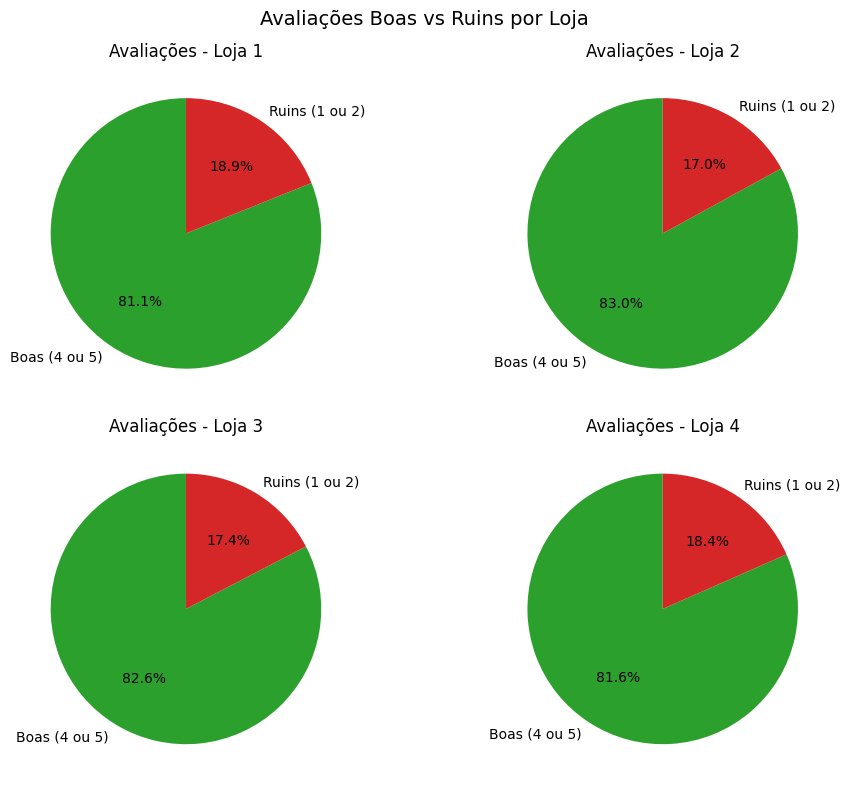

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (nome, valores) in zip(axes.flat, df_percentuais_boas_ruins.iterrows()):
    ax.pie(
        valores,
        labels=valores.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#2ca02c', '#d62728']
    )
    ax.set_title(f"Avaliações - {nome}")

plt.suptitle("Avaliações Boas vs Ruins por Loja", fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
def calcular_percentual_ruins(df):
    total = len(df)
    ruins = df["Avaliação da compra"].isin([1, 2]).sum()
    return (ruins / total) * 100

In [41]:
percentuais_ruins = {
    "Loja 1": calcular_percentual_ruins(loja1),
    "Loja 2": calcular_percentual_ruins(loja2),
    "Loja 3": calcular_percentual_ruins(loja3),
    "Loja 4": calcular_percentual_ruins(loja4),
}

In [42]:
avaliacoes_series = pd.Series(percentuais_ruins)

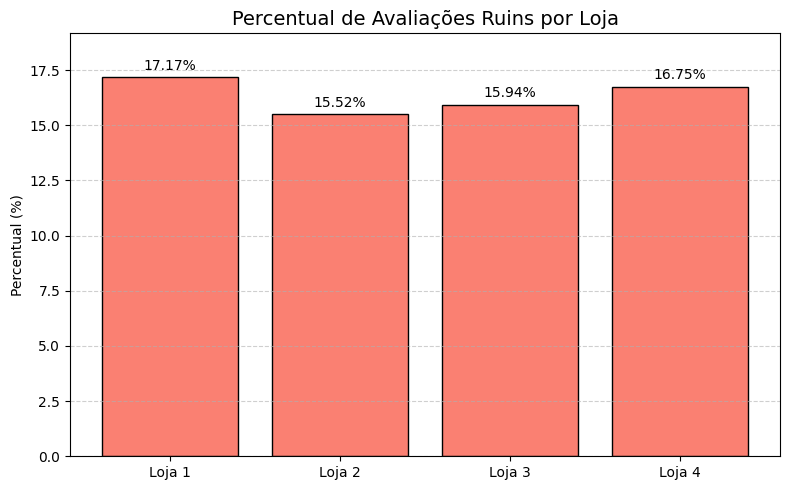

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(avaliacoes_series.index, avaliacoes_series.values, color='salmon', edgecolor='black')
ax.set_title("Percentual de Avaliações Ruins por Loja", fontsize=14)
ax.set_ylabel("Percentual (%)")
ax.set_ylim(0, max(avaliacoes_series.values) + 2)
ax.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f"{height:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [27]:
faturamento_total = {
    nome: df["Preço"].sum()
    for nome, df in lojas.items()
}


In [28]:
df_faturamento = pd.Series(faturamento_total).sort_values(ascending=False)

/tmp/ipython-input-30-251371901.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


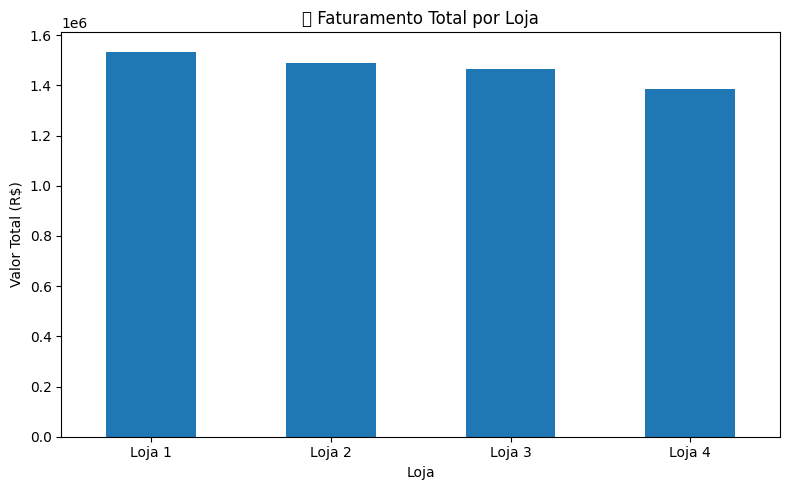

In [30]:
plt.figure(figsize=(8, 5))
df_faturamento.plot(kind='bar', color='#1f77b4')
plt.title("💰 Faturamento Total por Loja")
plt.ylabel("Valor Total (R$)")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
quantidade_vendida = {
    nome: df["Produto"].count()
    for nome, df in lojas.items()
}

In [32]:
df_quantidade = pd.Series(quantidade_vendida).sort_values(ascending=False)

/tmp/ipython-input-33-2490709146.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


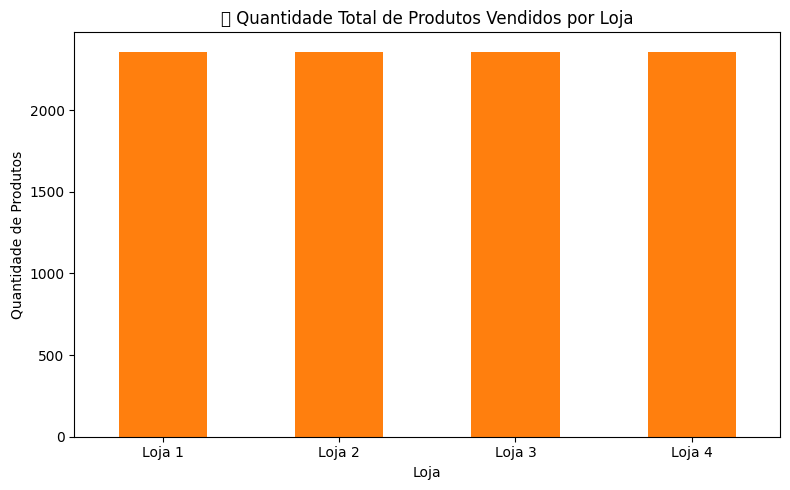

In [33]:
plt.figure(figsize=(8, 5))
df_quantidade.plot(kind='bar', color='#ff7f0e')
plt.title("📦 Quantidade Total de Produtos Vendidos por Loja")
plt.ylabel("Quantidade de Produtos")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
top_categorias_lojas = {}
for nome, df in lojas.items():
    categorias = df["Categoria do Produto"].value_counts().head(5)
    top_categorias_lojas[nome] = categorias

In [35]:
df_top_categorias = pd.concat(top_categorias_lojas, axis=1).fillna(0).astype(int)

/tmp/ipython-input-36-817413574.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


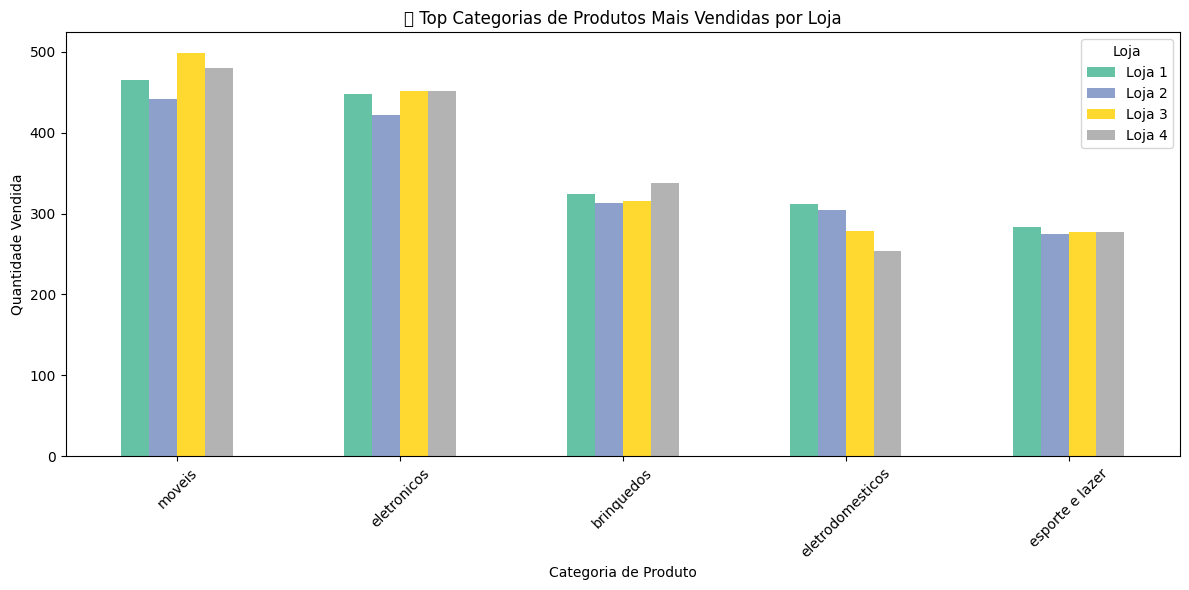

In [36]:
df_top_categorias.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("📦 Top Categorias de Produtos Mais Vendidas por Loja")
plt.xlabel("Categoria de Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.legend(title="Loja")
plt.tight_layout()
plt.show()

Relatório Final

Análise Comparativa de Desempenho – Lojas
Objetivo: Identificar a loja com menor eficiência para venda ou reformulação estratégica
Juliana Pereira
Data: 11/07/2025



📊 Análise baseada em:

Volume de vendas

Receita total e ticket médio

Avaliações dos clientes

Período: Dados históricos consolidados

Total de lojas avaliadas: 4

| Indicador                | Loja 1    | Loja 2     | Loja 3    | **Loja 4**    |
| ------------------------ | --------- | ---------- | --------- | ------------- |
| Vendas totais            | 2.359     | 2.359      | 2.359     | 2.358         |
| Receita Total (R\$)      | 1.616.347 | 1.567.773  | 1.542.047 | **1.458.253** |
| Ticket Médio (R\$)       | 685,18    | 664,59     | 653,69    | **618,43**    |
| Média de Avaliação       | 3,98      | 4,04       | **4,05**  | 4,00          |
| % Avaliações Ruins (1–2) | 17,17%    | **15,52%** | 15,94%    | **16,75%**    |


📉 Conclusão – Loja Menos Eficiente

A Loja 4 apresenta os seguintes pontos críticos:



### Menor receita total entre as lojas:

/tmp/ipython-input-46-2494113181.py:9: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


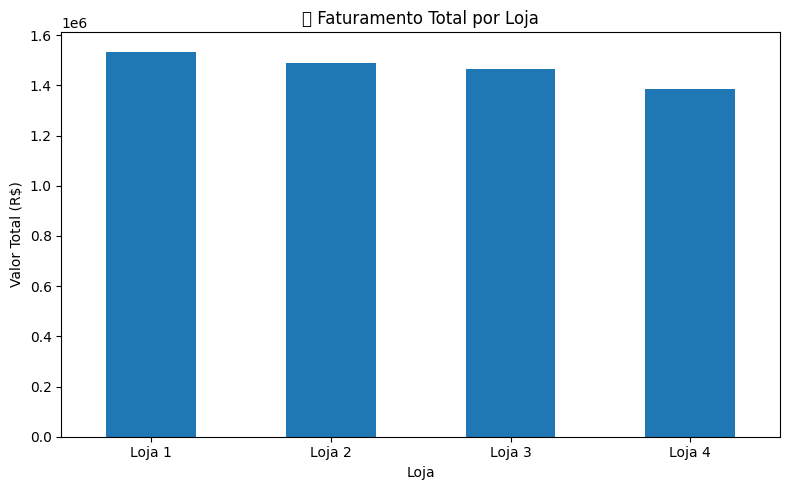

In [46]:
df_faturamento = pd.Series(faturamento_total).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
df_faturamento.plot(kind='bar', color='#1f77b4')
plt.title("💰 Faturamento Total por Loja")
plt.ylabel("Valor Total (R$)")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Menor ticket médio, afetando a lucratividade:

In [48]:
def calcular_ticket_medio(df, nome_loja):
    ticket = (df["Preço"] + df["Frete"]).sum() / len(df)
    print(f"💰 Ticket médio - {nome_loja}: R$ {ticket:.2f}")
    return ticket

calcular_ticket_medio(loja1, "Loja 1")
calcular_ticket_medio(loja2, "Loja 2")
calcular_ticket_medio(loja3, "Loja 3")
calcular_ticket_medio(loja4, "Loja 4")

💰 Ticket médio - Loja 1: R$ 685.18
💰 Ticket médio - Loja 2: R$ 664.59
💰 Ticket médio - Loja 3: R$ 653.69
💰 Ticket médio - Loja 4: R$ 618.43


np.float64(618.4280980148359)

### Avaliação média inferior às lojas 2 e 3:

In [50]:
def media_avaliacoes(df, nome_loja):
    media = df["Avaliação da compra"].mean()
    print(f"⭐ Média de avaliação - {nome_loja}: {media:.2f}")
    return

media_avaliacoes(loja1, "Loja 1")
media_avaliacoes(loja2, "Loja 2")
media_avaliacoes(loja3, "Loja 3")
media_avaliacoes(loja4, "Loja 4")

⭐ Média de avaliação - Loja 1: 3.98
⭐ Média de avaliação - Loja 2: 4.04
⭐ Média de avaliação - Loja 3: 4.05
⭐ Média de avaliação - Loja 4: 4.00


## Alta proporção de avaliações ruins (16,75%)

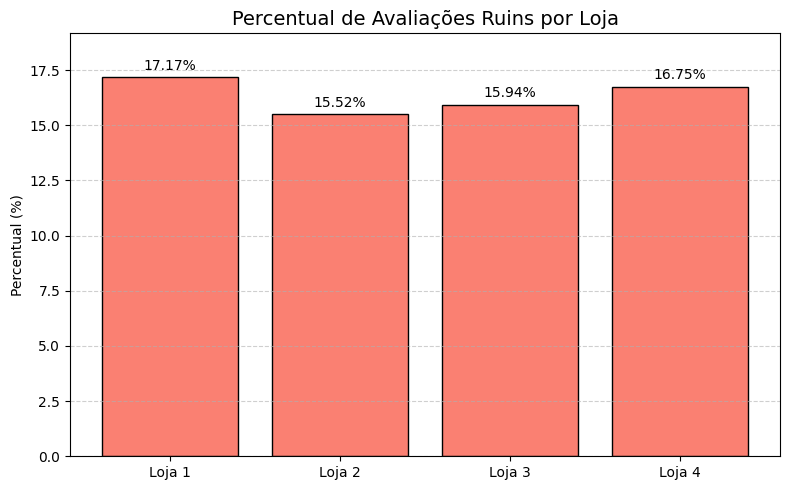

In [57]:
def calcular_percentual_ruins(df):
    total = len(df)
    ruins = df["Avaliação da compra"].isin([1, 2]).sum()
    return (ruins / total) * 100

avaliacoes_series = pd.Series(percentuais_ruins)

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(avaliacoes_series.index, avaliacoes_series.values, color='salmon', edgecolor='black')
ax.set_title("Percentual de Avaliações Ruins por Loja", fontsize=14)
ax.set_ylabel("Percentual (%)")
ax.set_ylim(0, max(avaliacoes_series.values) + 2)
ax.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f"{height:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

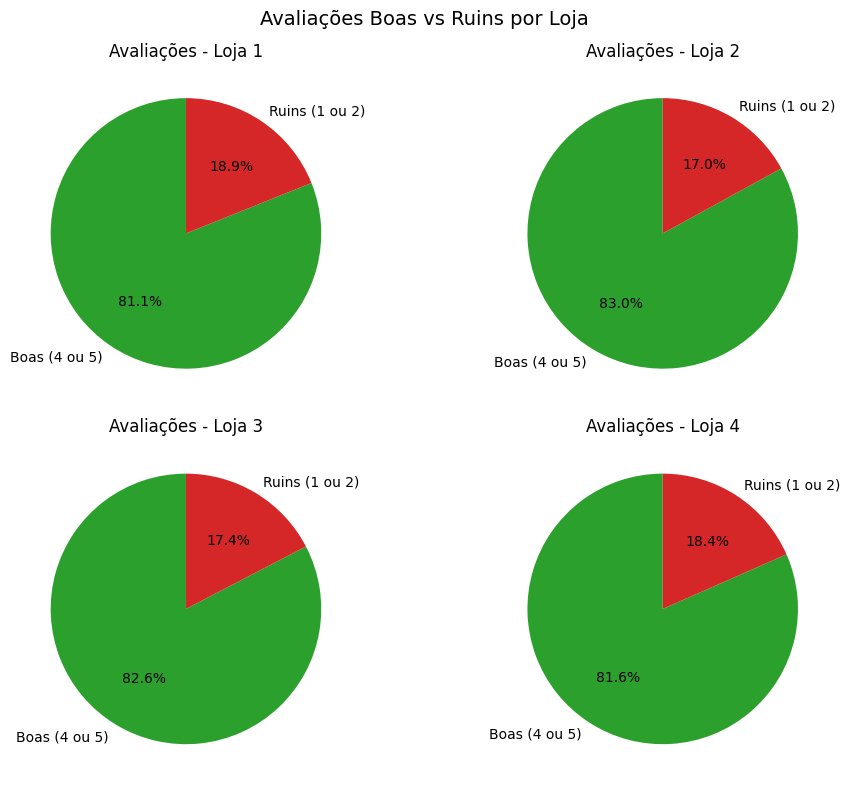

In [52]:
percentuais_boas_ruins = {}
for nome, df in lojas.items():
    boas = df[df["Avaliação da compra"].isin([4, 5])].shape[0]
    ruins = df[df["Avaliação da compra"].isin([1, 2])].shape[0]
    total = boas + ruins
    percentuais_boas_ruins[nome] = {
        "Boas (4 ou 5)": round((boas / total) * 100, 2),
        "Ruins (1 ou 2)": round((ruins / total) * 100, 2)
    }

df_percentuais_boas_ruins = pd.DataFrame(percentuais_boas_ruins).T

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (nome, valores) in zip(axes.flat, df_percentuais_boas_ruins.iterrows()):
    ax.pie(
        valores,
        labels=valores.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#2ca02c', '#d62728']
    )
    ax.set_title(f"Avaliações - {nome}")

plt.suptitle("Avaliações Boas vs Ruins por Loja", fontsize=14)
plt.tight_layout()
plt.show()

## Sem vantagem relevante em volume de vendas:

/tmp/ipython-input-60-3459599097.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


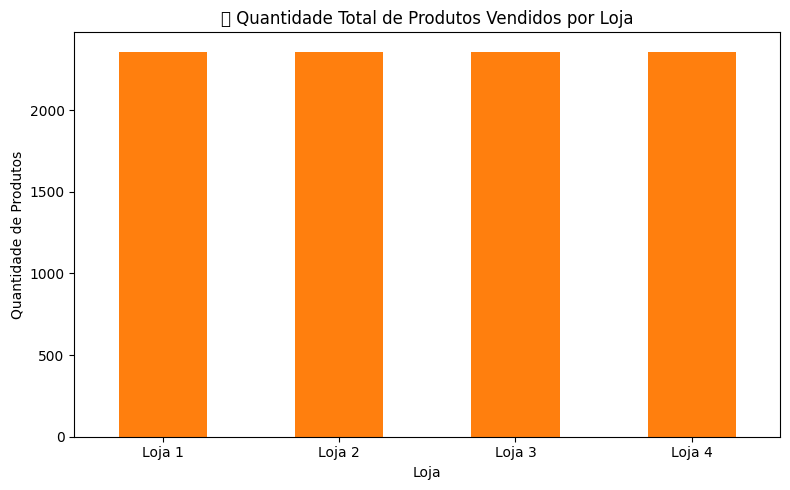

In [60]:
quantidade_vendida = {
    nome: df["Produto"].count()
    for nome, df in lojas.items()
}

df_quantidade = pd.Series(quantidade_vendida).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
df_quantidade.plot(kind='bar', color='#ff7f0e')
plt.title("📦 Quantidade Total de Produtos Vendidos por Loja")
plt.ylabel("Quantidade de Produtos")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

✅ Recomendação Final
💡 Loja 4 é a menos eficiente entre as quatro analisadas. Com base nos dados de desempenho, essa loja é a candidata ideal para ser vendida ou convertida para um novo empreendimento, pois:

Tem o pior retorno financeiro médio por pedido, os clientes avaliam pior do que a média e seu desempenho é inferior em quase todos os indicadores estratégicos.


